In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
5,1170,2,38.0
1,2600,4,120.0
11,2785,4,140.0
14,2250,3,101.0


In [7]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [9]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [24]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

0.22027979396433467

In [96]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        
        y_predicted = np.dot(w,X.T) + b
        
        w_grad = (-2/total_samples) * X.T.dot(y_true-y_predicted)
        b_grad = (-2/total_samples) * np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(y_true-y_predicted).mean()
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

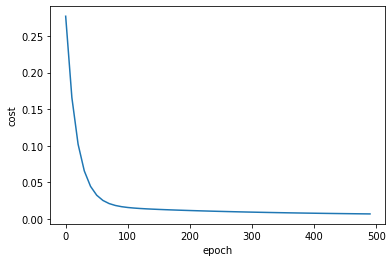

In [97]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [98]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    
    b = 0
    
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    import random
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = (-2/total_samples) * sample_x.T.dot(sample_y-y_predicted)
        b_grad = (-2/total_samples) * np.sum(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sg,b_sg,cost,cost_list,epoch_list = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

In [110]:

def mini_batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    b = 0
    
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        index = np.random.permutation(total_samples)
        sample_X = X[index]
        sample_y = y_true[index]
        for j in range(0,total_samples,5):
            Xj = sample_X[j:j+5]
            yj = sample_y[j:j+5]
            
            y_predicted = np.dot(w,Xj.T) + b
            w_mini = -2/5 * Xj.T.dot(yj-y_predicted)
            b_mini = -2/5 * np.sum(yj-y_predicted)

            w = w - learning_rate * w_mini
            b = b - learning_rate * b_mini

            cost = np.square(yj-y_predicted).mean()
        
        if i%5==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list
w_mini,b_mini,cost,cost_list,epoch_list = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
        

In [111]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = np.dot(w,scaled_X.T)+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2250,3,w,b),predict(2250,3,w_mini,b_mini)

(94.16701133317747, 93.94218803218105)

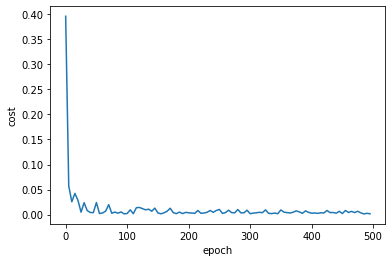

In [112]:
plt.xlabel('epoch')
plt.ylabel('cost')

plt.plot(epoch_list,cost_list)

In [113]:
def accuracy(X,y_true,w,b):
    y_predicted = np.dot(w,X.T) + b
    return np.square(y_predicted-y_true).mean()

accuracy(scaled_X,scaled_y,w,b),accuracy(scaled_X,scaled_y,w_mini,b_mini)

(0.22564864770080312, 0.19744376147328085)